In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nlp-getting-started:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F17777%2F869809%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240327%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240327T215850Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4a38ff5ee8c129d50bcf7688e9df9ed867df9013fd8a2b30a737746719f8611daf7a8b763bb7d4fb6f7409e679ff7fc9abf8343b9795ba5041c5f7aa36c2b29ecf37c746fab632b07553784b2967a88b12d1d95ebc9075833647e58970ff2088f0f6baf4294ffac741151cdd4ac9f2c80a072b16fbb8cab53b126f03728e1200c7a679b35b33efb72a4af03b5a245f6e1b115588a54e3035df6119a1078b56067093598e800a36ec44bbe0c9269f1a85f0c3cec36b2c43d3b28e089d8a1329583078e5398cbaa889aef1ebd74a97797d2bcc401726ec76bb889f1768ee7c73bfddc71a9b0f3743102debda8e3b2979e88ed06406d4aa43cce48f997e863eff7b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 607343 bytes downloaded
Downloaded and uncompressed: nlp-getting-started
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [45]:
df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

df_test_sample = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

print(df_train.shape)
df_train.drop_duplicates(subset=['text'], inplace=True)
print(df_train.shape)

from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your DataFrame and it includes a 'target' column for labels

# Features and target variable
X = df_train.drop('target', axis=1)  # Features (all columns except 'target')
y = df_train['target']  # Target variable

# Splitting the data into training and test sets
# test_size specifies the proportion of the test set (e.g., 0.2 for 20%)
# random_state is a seed for reproducibility
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



(7613, 5)
(7503, 5)


In [46]:
print(df_train.head())
print(df_train.shape)
print(df_train.info())

        id     keyword                        location  \
5002  7135    military                             NaN   
4671  6638  inundation                  Athens, Greece   
3701  5265        fear  sitting on the fence, New York   
2984  4288    drowning                             NaN   
2540  3645  desolation                         Romania   

                                                   text  
5002  @UniversityofLaw For the people who died in Hu...  
4671  Potential Storm Surge Flooding Map by National...  
3701  @phnotf sometimes your cheekiness bleeds throu...  
2984  can still see it...blank expression...cheeks c...  
2540  Imagini noi si 2 clipuri The Hobbit: The Desol...  
(6002, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002 entries, 5002 to 7373
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6002 non-null   int64 
 1   keyword   5960 non-null   object
 2   location  4037 non-null   o

In [47]:
print(df_train.keyword.value_counts())
print(df_train.location.value_counts())
print(y_train.value_counts())

fatalities               42
damage                   38
blaze                    37
siren                    36
pandemonium              35
                         ..
forest%20fire            16
epicentre                12
inundation                9
threat                    7
radiation%20emergency     6
Name: keyword, Length: 221, dtype: int64
USA                             85
New York                        59
United States                   42
London                          33
Los Angeles, CA                 24
                                ..
Nicola Valley                    1
#goingdownthetoilet Illinois     1
The Windy City                   1
Prehistoric Earth                1
Bangalore, INDIA                 1
Name: location, Length: 2743, dtype: int64
0    3431
1    2571
Name: target, dtype: int64


In [48]:
df_train.duplicated(subset=['text']).sum()

0

(6090, 4)
(6022, 4)


In [49]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [50]:
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Remove usernames (mentions)
    text = re.sub(r'@\w+', '', text)

    # Remove symbols and special characters (except for spaces)
    text = re.sub(r'[^\w\s]', '', text)

    return text

df_train['text'] = df_train['text'].apply(preprocess_tweet)
df_test['text'] = df_test['text'].apply(preprocess_tweet)

In [51]:
df_train['text'][12]

'raining flooding florida tampabay tampa 18 or 19 days ive lost count '

In [52]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import defaultdict

In [53]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(df_train.text)

In [54]:
print(X_vec.shape)  # Should show (number_of_samples, number_of_features)
print(len(y_train))

(6002, 13801)
6002


In [55]:

def top_n_words_per_label(X_vectorized, labels, vectorizer, n=5):
    features = np.array(vectorizer.get_feature_names_out())
    unique_labels = np.unique(labels)
    top_words = defaultdict(list)

    for label in unique_labels:
        # Select the rows where the labels match the current label
        idx = labels == label
        X_sub = X_vectorized[idx]

        # Calculate the mean TF-IDF score for each feature/word
        mean_scores = np.mean(X_sub, axis=0)

        # Ensure we're working with a dense array for mean score manipulation
        mean_scores_array = np.array(mean_scores).flatten()

        # Identify top n indices of words for the current label
        top_n_indices = mean_scores_array.argsort()[-n:]

        # Map indices to actual words
        top_words[label] = features[top_n_indices]

    return top_words
# Example usage
top_words = top_n_words_per_label(X_vec, y_train, vectorizer, n=50)
print(top_words)

defaultdict(<class 'list'>, {0: array(['how', 'no', 'dont', 'do', 'from', 'as', 'when', 'one', 'we',
       'has', 'or', 'now', 'he', 'amp', 'up', 'at', 'its', 'get', 'new',
       'not', 'if', 'will', 'but', 'out', 'all', 'by', 'was', 'your',
       'are', 'have', 'so', 'just', 'like', 'be', 'me', 'this', 'im',
       'with', 'that', 'on', 'it', 'for', 'is', 'in', 'my', 'of', 'and',
       'you', 'to', 'the'], dtype=object), 1: array(['bombing', 'than', 'homes', 'nuclear', 'like', 'families', 'no',
       'an', 'be', 'wildfire', 'crash', 'people', 'my', 'killed', 'storm',
       'police', 'mh370', 'fires', 'who', 'over', 'hiroshima', 'have',
       'up', 'it', 'were', 'disaster', 'via', 'more', 'suicide', 'that',
       'with', 'was', 'california', 'are', 'news', 'this', 'after', 'as',
       'fire', 'is', 'at', 'from', 'by', 'for', 'on', 'and', 'to', 'of',
       'the', 'in'], dtype=object)})


In [56]:
print([x for x in top_words[0] if x in top_words[1]])
print([x for x in top_words[1] if x in top_words[0]])

['no', 'from', 'as', 'up', 'at', 'by', 'was', 'are', 'have', 'like', 'be', 'this', 'with', 'that', 'on', 'it', 'for', 'is', 'in', 'my', 'of', 'and', 'to', 'the']
['like', 'no', 'be', 'my', 'have', 'up', 'it', 'that', 'with', 'was', 'are', 'this', 'as', 'is', 'at', 'from', 'by', 'for', 'on', 'and', 'to', 'of', 'the', 'in']


In [57]:
most_common_words = list(set([x for x in top_words[0] if x in top_words[1]] + [x for x in top_words[1] if x in top_words[0]]))
print(most_common_words)

['to', 'it', 'no', 'of', 'on', 'is', 'up', 'as', 'are', 'the', 'for', 'my', 'have', 'from', 'that', 'by', 'be', 'was', 'like', 'at', 'in', 'and', 'with', 'this']


In [58]:
def remove_common_words(text):

    common_words = ['be', 'for', 'when', 'this', 'by', 'is', 'from', 'with', 'have', 'that', 'and', 'to', 'up', 'in', 'it', 'at', 'as', 'no', 'you', 'my', 'of', 'was', 'are', 'the', 'on']

    # Tokenize the text into words
    words = text.split()

    # Remove common words
    words = [word for word in words if word not in common_words]

    # Rejoin words to form the cleaned text
    text = ' '.join(words)

    return text


df_train['text'] = df_train['text'].apply(remove_common_words)
df_test['text'] = df_test['text'].apply(remove_common_words)

df_train['text'][1]

'forest fire near la ronge sask canada'

In [59]:
def top_n_words_per_label(X, labels, vectorizer, n=5):
    features = np.array(vectorizer.get_feature_names_out())
    unique_labels = np.unique(labels)
    top_words_scores = defaultdict(list)

    for label in unique_labels:
        idx = labels == label
        X_sub = X[idx]

        # Calculate the mean TF-IDF score for each feature/word
        mean_scores = np.mean(X_sub, axis=0)

        # Convert the mean scores to a dense array and flatten it for easier manipulation
        mean_scores_array = np.array(mean_scores).flatten()

        # Get the indices that would sort the array, then take the last n indices for the top n scores
        top_n_indices = mean_scores_array.argsort()[-n:]

        # Extract the corresponding top n scores
        top_n_scores = mean_scores_array[top_n_indices]

        # Map the top n indices to their respective words and scores
        for i in range(n):
            index = top_n_indices[i]
            word = features[index]
            score = top_n_scores[i]
            top_words_scores[label].append((word, score))

    return top_words_scores



vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train.text)
X_test = vectorizer.transform(df_test.text)
top_words = top_n_words_per_label(X, y_train, vectorizer, n=50)
print(top_words)

defaultdict(<class 'list'>, {0: [('more', 0.0042191023057576525), ('back', 0.004339504192782043), ('time', 0.004359146587060938), ('still', 0.0043738412955925945), ('got', 0.004420813580555529), ('day', 0.004461389196170229), ('know', 0.004529266940062425), ('them', 0.004579403439348167), ('his', 0.004654721651815221), ('video', 0.004740840470364142), ('cant', 0.004790521638633135), ('there', 0.004860662363123401), ('via', 0.004891815939565684), ('been', 0.004937940260104611), ('would', 0.005039502132726716), ('her', 0.005061083351697154), ('see', 0.005167355601925135), ('why', 0.005208218279769856), ('can', 0.005844697463894988), ('body', 0.005851474228238766), ('an', 0.00595608017329079), ('they', 0.006253360384977475), ('love', 0.006448445781509757), ('about', 0.0065136666135642), ('what', 0.006569651845918551), ('how', 0.006645013143886788), ('dont', 0.006874459305370781), ('do', 0.006912284208237413), ('has', 0.006923155969771607), ('one', 0.0069912248309286825), ('we', 0.00699284

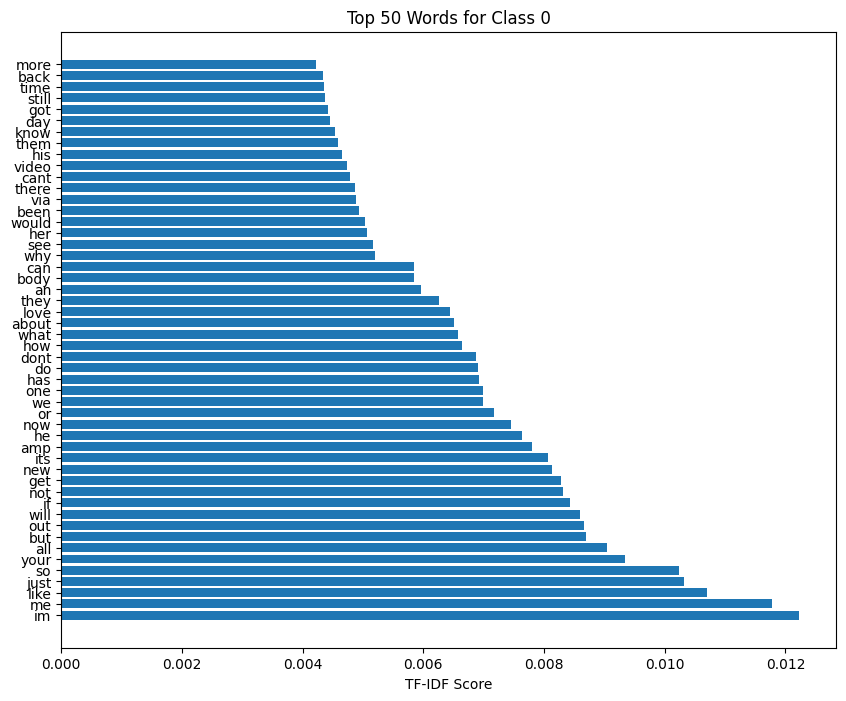

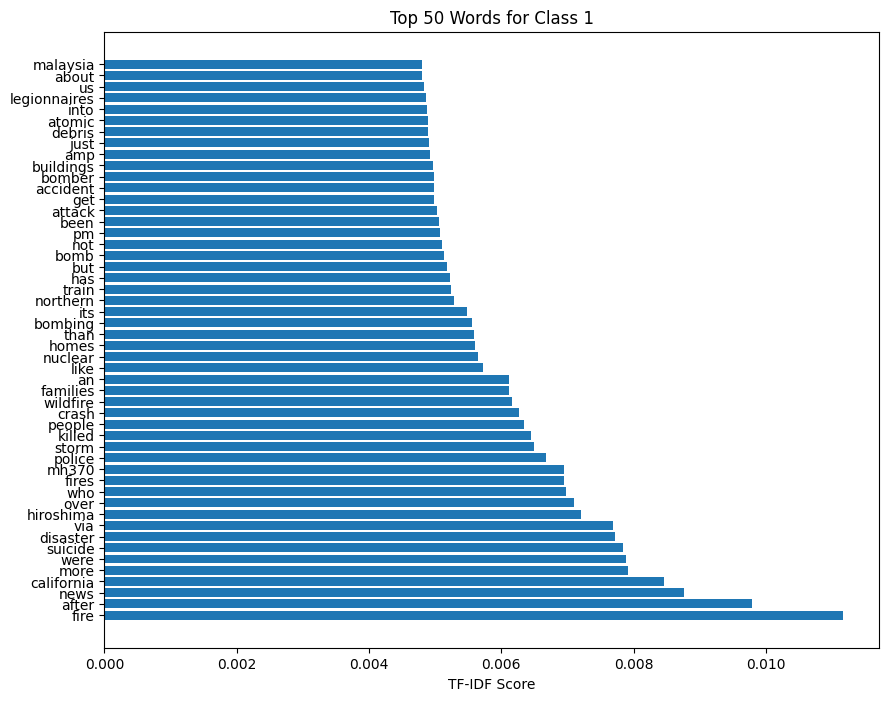

In [60]:
import matplotlib.pyplot as plt
def plot_top_words_by_class(top_words_with_scores, n=50):
    for label, words_scores in top_words_with_scores.items():
        words, scores = zip(*words_scores[:n])  # Unzipping words and their scores

        # Plot
        plt.figure(figsize=(10, 8))
        plt.barh(range(n), scores, align='center')
        plt.yticks(range(n), words)
        plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
        plt.xlabel('TF-IDF Score')
        plt.title(f'Top {n} Words for Class {label}')
        plt.show()

plot_top_words_by_class(top_words, n=50)

In [61]:
top_words[1]

[('malaysia', 0.004796347499895391),
 ('about', 0.004797600537143191),
 ('us', 0.004834551942656482),
 ('legionnaires', 0.004859033162713991),
 ('into', 0.004875974793330163),
 ('atomic', 0.00488702337395309),
 ('debris', 0.004897345470195839),
 ('just', 0.004899957889305144),
 ('amp', 0.004917588774854167),
 ('buildings', 0.004966068739906975),
 ('bomber', 0.004974987425520361),
 ('accident', 0.004979601651490141),
 ('get', 0.004980932667329946),
 ('attack', 0.00502138037122073),
 ('been', 0.005060956136642035),
 ('pm', 0.005066501538038866),
 ('not', 0.005108410360881831),
 ('bomb', 0.005139099831906906),
 ('but', 0.00518329810776493),
 ('has', 0.005216613125654696),
 ('train', 0.00523521382313027),
 ('northern', 0.005288524657113604),
 ('its', 0.0054739003072255266),
 ('bombing', 0.005551658594410387),
 ('than', 0.005584971560838148),
 ('homes', 0.0055979482663016675),
 ('nuclear', 0.005640275316593122),
 ('like', 0.00572307550957845),
 ('an', 0.0061182717057983015),
 ('families', 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have your preprocessed data ready
# X_train, X_val, y_train, y_val = your_data_split()

# Parameters (you may need to adjust these based on your dataset)
vocab_size = 3000  # Adjust based on your vocabulary size
embedding_dim = 8  # Size of the embedding vectors; smaller for fewer resources
max_length = 100    # Maximum length of input sequences
trunc_type = 'post' # Truncate longer sequences from the end
padding_type = 'post' # Pad sequences to ensure uniform length

# Define the model
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    GRU(8),  # GRU layer with 32 units; adjust as needed
    Dense(8, activation='relu'),  # Additional dense layer for more complex patterns
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

# Early stopping to prevent overfitting

# Train the model
history = model.fit(X.toarray(), y_train, epochs=1, batch_size=64, validation_data=(X_test.toarray(), y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 8)           24000     
                                                                 
 gru_4 (GRU)                 (None, 8)                 432       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 24513 (95.75 KB)
Trainable params: 24513 (95.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
 7/94 [=>............................] - ETA: 44:11 - loss: 0.6930 - accuracy: 0.5201

In [ ]:
df_train.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [ ]:
model.save("model.keras")

NameError: name 'model' is not defined

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Parameters (you may need to adjust these based on your dataset)
vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 8  # Size of the embedding vectors; smaller for fewer resources
max_length = 100    # Maximum length of input sequences
trunc_type = 'post' # Truncate longer sequences from the end
padding_type = 'post' # Pad sequences to ensure uniform length


model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(16),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Now, load the weights (assuming you have them saved):
model.load_weights('/kaggle/input/nlp-getting-started/model.keras')
#loaded_model = tf.keras.models.load_model('/kaggle/input/nlp-getting-started/model (1).keras')

In [41]:
import pandas as pd
from scipy.sparse import csr_matrix

# Assuming 'df_test_sample' is your DataFrame containing the test data
test_texts = df_test_sample['text'].tolist()

# Vectorize the test data
X_test_sparse = vectorizer.transform(test_texts)  # This returns a sparse matrix

# If your model requires dense input, you can convert it like this:
X_test_dense = X_test_sparse.toarray()  # Be cautious with memory usage here


In [42]:
predictions = model.predict(X_test_dense)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 13776)


In [ ]:
predicted_labels = (predictions.flatten() > 0.5).astype(int)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

# Ensure the predicted_labels align with the sample_submission format
sample_submission['target'] = predicted_labels  # 'target' should be replaced with the actual column name for predictions

# Save your predictions to a CSV file
sample_submission.to_csv('my_submission.csv', index=False)